# BoomBikes Case Study.

## Problem Statement: 

#### Objective: Build a Multiple linear regression model for the prediction of demand of shared bikes

    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### Steps we follow:

    Reading, understanding and visualizing thee data. 
    Preparing the data for modelling (train-test-split)
    Training the data.
    Resedual Analysis
    Predictions and evaluation the test set

## Reading and understanding the data:

In [1]:
# import the required libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv("day.csv") # Read the data

In [3]:
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
day.shape # shape of the data

(730, 16)

In [5]:
day = day.drop('instant', axis = 1) # drop the instant column as the numbering can be known from index column.

In [6]:
day.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [7]:
# You can also drop the dteday as it is explained by season, yr and mnth.

day = day.drop('dteday', axis = 1)

In [8]:
day.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [9]:
day.info() # There is no null columns in this data sheet.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [10]:
# Convert numerical representations of categorical variables into categorical variables for analysis. 
# season, month, weathersit, weekday are categorical variables. Convert them into categorical variable and analyse through boxplot.

In [11]:
day['season'].value_counts() # here 1: spring, 2: summer, 3: fall, 4: winter , therefore we shall change it accordingly.

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
def change_season(x):        # changed the numerical season variable to categorical
    if x== 1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
day['season'] = day['season'].apply(change_season)

In [13]:
day['season'].dtypes # after conversion, the datatype is object. i.e., no need to use astype function.

dtype('O')

In [14]:
day['mnth'].value_counts() # here 1 to 12 represents months in order starting with jan and ending with dec. 
                            # therefore we shall change accordingly

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [15]:
def change_month(x):                       # changed the numerical month variable to categorical
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

day[['mnth']] = day[['mnth']].apply(change_month)

In [16]:
day['mnth'].dtypes     # after conversion, the datatype is object. i.e., no need to use astype function.

dtype('O')

In [17]:
day.weathersit.value_counts() # here 1:clear, 2: mist, 3: Light_rain  4:heavy_rain

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
def change_weathersit(x):              # changed the numerical weathersit variable to categorical
    if x== 1:
        return 'clear'
    elif x==2:
        return 'mist'
    elif x==3:
        return 'lightrain'
    else:
        return 'heavyrain'
    
day['weathersit'] = day['weathersit'].apply(change_weathersit)

In [19]:
day.weathersit.dtypes       # after conversion, the datatype is object. i.e., no need to use astype function.

dtype('O')

In [20]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.0+ KB


In [21]:
day.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [22]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [23]:
day.weekday.value_counts()  # 1: monday, 2: tuesday, 3: wednesday, 4:thursday, 5: friday , 6: saturday, 7: sunday
                            # lets change them accordingly

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [24]:
def change_weekday(x):            # changed the numerical weekday variable to categorical
    return x.map({
        1:'mon',
        2:'tues',
        3:'wed',
        4:'thur',
        5:'fri',
        6:'sat',
        0:'sun',        
    })

day[['weekday']] = day[['weekday']].apply(change_weekday)

In [25]:
day.weekday.dtypes        # after conversion, the datatype is object. i.e., no need to use astype function.

dtype('O')

In [26]:
day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [27]:
day.head()    # head of the data after converting to categorical columns

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     mon           1       mist  14.110847   
1  spring   0  Jan        0    tues           1       mist  14.902598   
2  spring   0  Jan        0     wed           1      clear   8.050924   
3  spring   0  Jan        0    thur           1      clear   8.200000   
4  spring   0  Jan        0     fri           1      clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [28]:
day.tail()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
725  spring   1  Dec        0     fri           1       mist  10.420847   
726  spring   1  Dec        0     sat           0       mist  10.386653   
727  spring   1  Dec        0     sun           0       mist  10.386653   
728  spring   1  Dec        0     mon           1      clear  10.489153   
729  spring   1  Dec        0    tues           1       mist   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  
725  11.33210  65.2917  23.458911     247        1867  2114  
726  12.75230  59.0000  10.416557     644        2451  3095  
727  12.12000  75.2917   8.333661     159        1182  1341  
728  11.58500  48.3333  23.500518     364        1432  1796  
729  11.17435  57.7500  10.374682     439        2290  2729

In [29]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [30]:
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# created a list of categorical variables to get some insights through box plots


In [31]:
num_col = day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# created a dataframe of numerical variables to get some insights through pair-plots


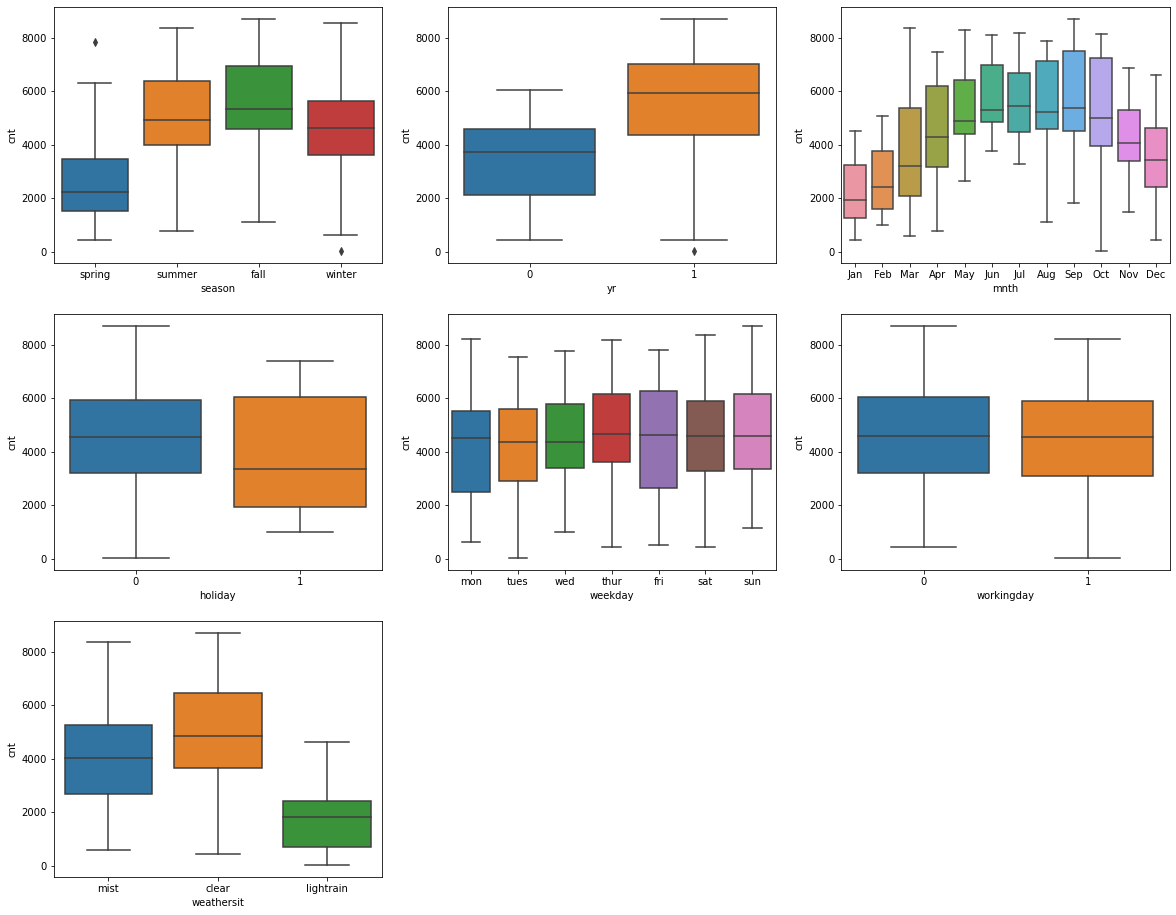

In [32]:
# Boxplots of categorical variables vs target variable 'cnt'
plt.figure(figsize=(20,16))
plt.subplot(3,3,1) # plt.subplot(331)                         # create subplots with 3 rows, 3 columns 
sns.boxplot(x='season', y='cnt', data=day)                    # first plot between seasons and cnt
plt.subplot(3,3,2) 
sns.boxplot(x='yr', y='cnt', data=day)                         # plot between year  and cnt, where 0--> 2018, 1 --> 2019
plt.subplot(3,3,3) 
sns.boxplot(x='mnth', y='cnt', data=day)                        # plot between month and cnt
plt.subplot(3,3,4) 
sns.boxplot(x='holiday', y='cnt', data=day)                     # plot between holiday and cnt
plt.subplot(3,3,5) 
sns.boxplot(x='weekday', y='cnt', data=day)                      # plot between weekday and cnt
plt.subplot(3,3,6) 
sns.boxplot(x='workingday', y='cnt', data=day)                    # plot between workingday and cnt
plt.subplot(3,3,7) 
sns.boxplot(x='weathersit', y='cnt', data=day)                     # plot between weathersit and cnt
plt.show();

**`Inferences : `** 
    1). Bike rentals are greater in fall season.
    2). There is a clear growth in bike rentals from inaugural year (2018) to the next year.
    3). There is little change in rentals on what ever day it was, the count is almost same on all days. And there is no parity between working day and non-working day, since the rentals are same.

In [33]:
x = num_col.columns      # assigned the list of numeric columns to 'x'
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [34]:
day[x].head()

temp     atemp      hum  windspeed  casual  registered   cnt
0  14.110847  18.18125  80.5833  10.749882     331         654   985
1  14.902598  17.68695  69.6087  16.652113     131         670   801
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

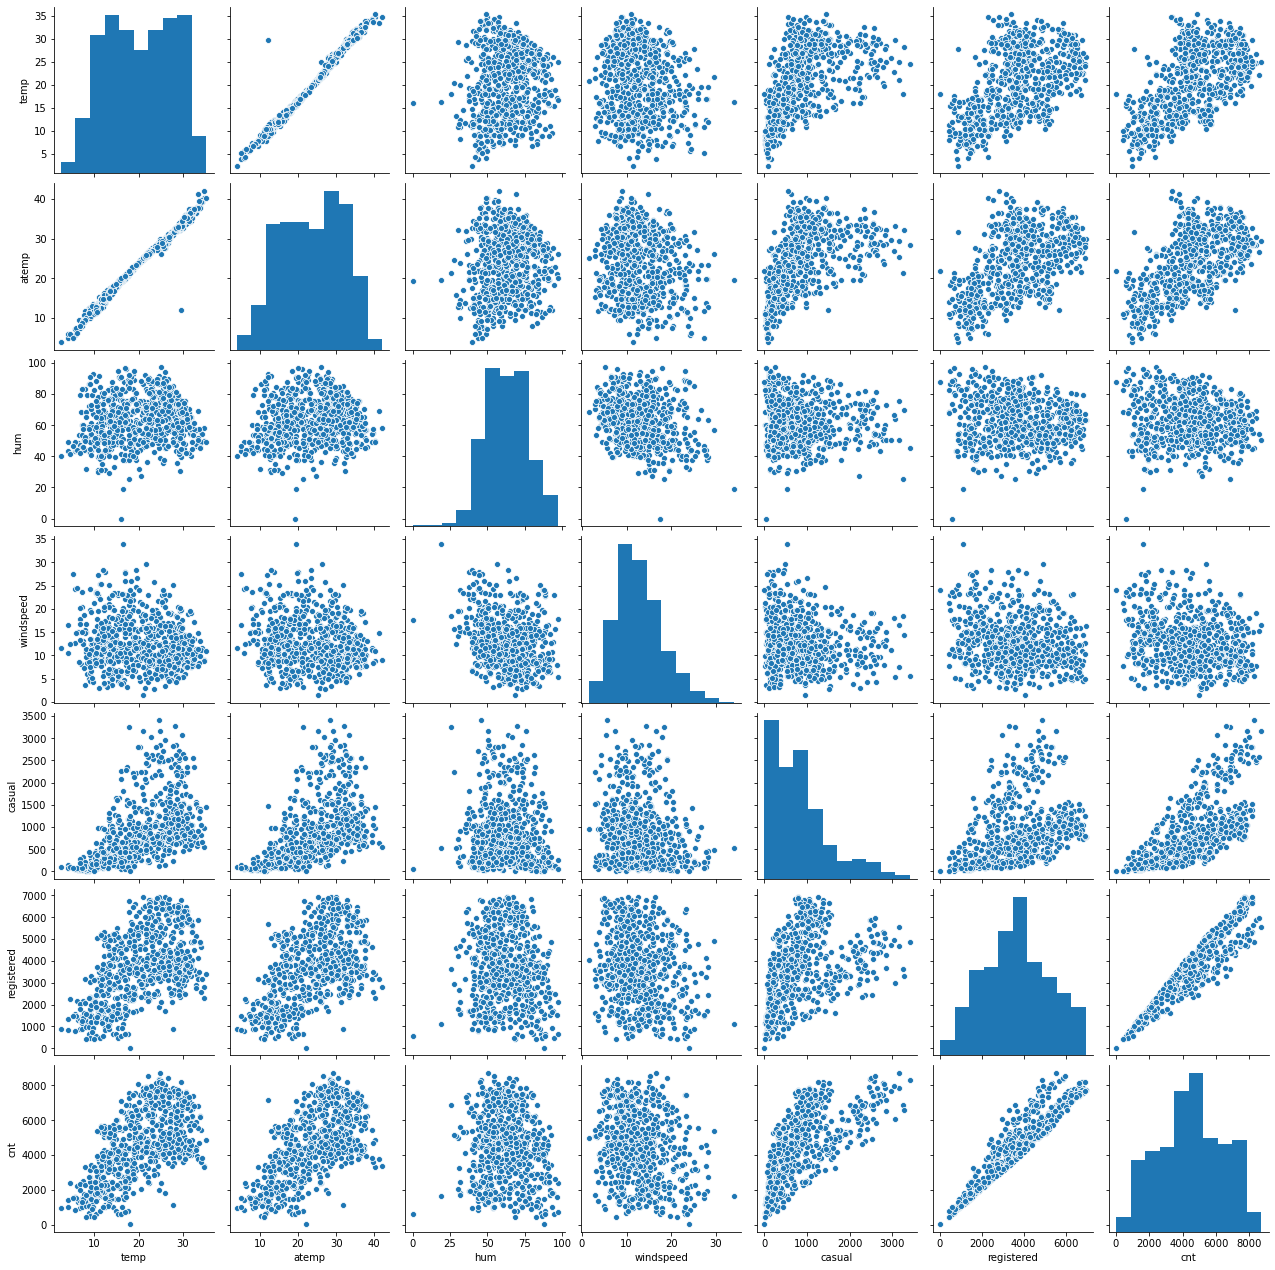

In [35]:
sns.pairplot(day[x])   # pairplots for numeric variables

**`Observations:`** 

1). we saw a greatest correlation between columns (temperature and ambient temparature) & columns (registered and cnt). Therefore, this is the case of multi-collinearity. It means one variable among them is sufficient to explain the model or predict the model. So lets drop **`ambient temperature (atemp)`** and **`registered`** columns.

In [36]:
# Drop the atemp column to avoid multi colinearity.
day = day.drop('atemp',axis = 1) 

In [37]:
num_col = day[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']] #create new numerical data frame after removing atemp

In [38]:
x= num_col.columns
x

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [39]:
res = day[x].corr()       # lets see the correlation between all the remaining num columns after droping 'atemp' column.
res

temp       hum  windspeed    casual  registered       cnt
temp        1.000000  0.128565  -0.158186  0.542731    0.539436  0.627044
hum         0.128565  1.000000  -0.248506 -0.075211   -0.089212 -0.098543
windspeed  -0.158186 -0.248506   1.000000 -0.167995   -0.217914 -0.235132
casual      0.542731 -0.075211  -0.167995  1.000000    0.394137  0.672123
registered  0.539436 -0.089212  -0.217914  0.394137    1.000000  0.945411
cnt         0.627044 -0.098543  -0.235132  0.672123    0.945411  1.000000

In [40]:
day = day.drop('registered', axis = 1)    # as we saw the correlation between cnt and rregistered is 0.945, drop registered col.
                                           # here we are not droping cnt column as it is target variable.

In [41]:
num_col = day[['temp', 'hum', 'windspeed', 'casual', 'cnt']]
x= num_col.columns
res = day[x].corr()
res         # written a code to observe the correlation among remaining numeric variables after removing registered col

temp       hum  windspeed    casual       cnt
temp       1.000000  0.128565  -0.158186  0.542731  0.627044
hum        0.128565  1.000000  -0.248506 -0.075211 -0.098543
windspeed -0.158186 -0.248506   1.000000 -0.167995 -0.235132
casual     0.542731 -0.075211  -0.167995  1.000000  0.672123
cnt        0.627044 -0.098543  -0.235132  0.672123  1.000000

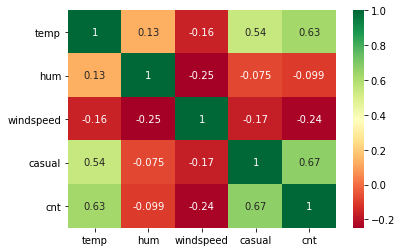

In [42]:
sns.heatmap(res, annot = True, cmap = 'RdYlGn') # ploted  a heatmap to see the correlations
plt.show()                                    #  it is infered that every variable is required to devolop a linear model.  

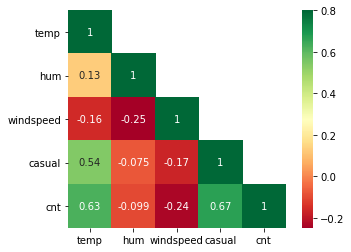

In [43]:
# heatmap to represent redundant blocks for better asthetics.
mask = np.array(day[x].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
sns.heatmap(day[x].corr(), mask=mask, vmax=0.8, square=True, annot=True, cmap = 'RdYlGn');

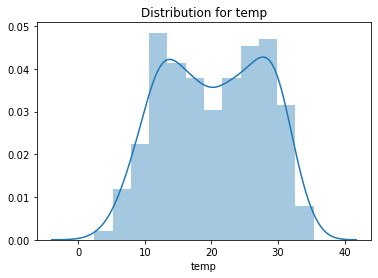

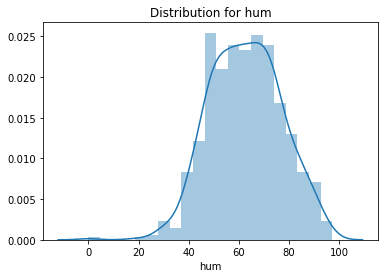

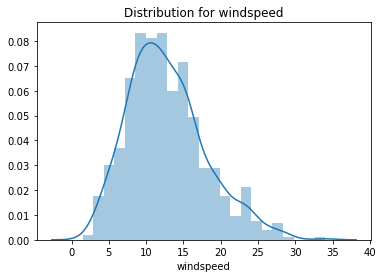

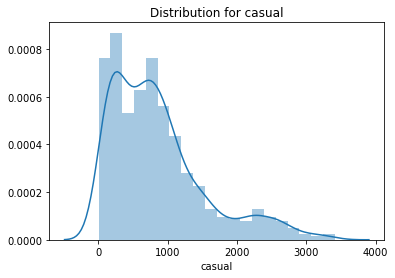

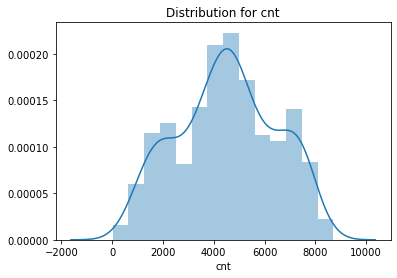

In [44]:
for col in x:
    sns.distplot(day[col])
    plt.title("Distribution for "+col)      # code to see distplot of al the numeric columns, shows the frequecies of variables
    plt.show();
    print("=================================")

## Creating Dummies

In [45]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [46]:
# extract the categorical variables from data set and create a col

dummy_col = day.select_dtypes(include=['object'])

# Dummies usually created to convert the categorical columns to numerical columns 

In [47]:
# create a dataframe for dummies.
status = pd.get_dummies(dummy_col,drop_first=True)
status.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth_Oct  mnth_Sep  \
0         1         0         0         0  ...         0         0   
1         1         0         0         0  ...         0         0   
2         1         0         0         0  ...         0         0   
3         1         0         0         0  ...         0         0   
4         1         0         0         0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thur  weekday_tues  \
0            1            0            0             0             0   
1            0            0            0             0             1   
2            0            0            0             0             0   
3            0            0            0             1             0   
4            0            0            0             0             0   

   weekday_wed  weathersit_lightrain  weathersit_mist  
0            0                     0                1  
1            0                     0                1  
2            1                     0                0  
3            0                     0                0  
4            0                     0                0  

[5 rows x 22 columns]

In [48]:
# add both the dataframes horizontally
day = pd.concat([day, status], axis=1)

In [49]:
day.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     mon           1       mist  14.110847   
1  spring   0  Jan        0    tues           1       mist  14.902598   
2  spring   0  Jan        0     wed           1      clear   8.050924   
3  spring   0  Jan        0    thur           1      clear   8.200000   
4  spring   0  Jan        0     fri           1      clear   9.305237   

       hum  windspeed  ...  mnth_Oct  mnth_Sep  weekday_mon  weekday_sat  \
0  80.5833  10.749882  ...         0         0            1            0   
1  69.6087  16.652113  ...         0         0            0            0   
2  43.7273  16.636703  ...         0         0            0            0   
3  59.0435  10.739832  ...         0         0            0            0   
4  43.6957  12.522300  ...         0         0            0            0   

   weekday_sun  weekday_thur  weekday_tues  weekday_wed  weathersit_lightrain  \
0            0             0             0            0                     0   
1            0             0             1            0                     0   
2            0             0             0            1                     0   
3            0             1             0            0                     0   
4            0             0             0            0                     0   

   weathersit_mist  
0                1  
1                1  
2                0  
3                0  
4                0  

[5 rows x 34 columns]

In [50]:
list(dummy_col) # form a list of categorical columns to permenantly drop them.

['season', 'mnth', 'weekday', 'weathersit']

In [51]:
# drop the categorical columns ['season', 'mnth', 'weekday', 'weathersit']
day = day.drop(list(dummy_col), axis=1)

In [52]:
day.shape # lets look at the shape of the new and final data frame before modelling.

(730, 30)

In [53]:
day.head()

yr  holiday  workingday       temp      hum  windspeed  casual   cnt  \
0   0        0           1  14.110847  80.5833  10.749882     331   985   
1   0        0           1  14.902598  69.6087  16.652113     131   801   
2   0        0           1   8.050924  43.7273  16.636703     120  1349   
3   0        0           1   8.200000  59.0435  10.739832     108  1562   
4   0        0           1   9.305237  43.6957  12.522300      82  1600   

   season_spring  season_summer  ...  mnth_Oct  mnth_Sep  weekday_mon  \
0              1              0  ...         0         0            1   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            0   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_sat  weekday_sun  weekday_thur  weekday_tues  weekday_wed  \
0            0            0             0             0            0   
1            0            0             0             1            0   
2            0            0             0             0            1   
3            0            0             1             0            0   
4            0            0             0             0            0   

   weathersit_lightrain  weathersit_mist  
0                     0                1  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                0  

[5 rows x 30 columns]

In [54]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tues',
       'weekday_wed', 'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

In [55]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   casual                730 non-null    int64  
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    uint8  
 9   season_summer         730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_Aug              730 non-null    uint8  
 12  mnth_Dec              730 non-null    uint8  
 13  mnth_Feb              730 non-null    uint8  
 14  mnth_Jan              730 non-null    uint8  
 15  mnth_Jul              7

### Preparing the data for modelling:
    - import the libraries
    - split the data into and train and test sets
    - Rescaling the data 
        * Min-max scaling (Normalization : i.e., bringing the data into 0 and 1) ----> **` preferred `**
        * Standardization (Bringing the data around the mean, so the over mean is 0)

In [56]:
df_train, df_test = train_test_split(day, train_size = 0.7, random_state = 100) # Create train and test sets
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [57]:
from sklearn.preprocessing import MinMaxScaler  # import the MinMaxScaler to scale the numeric values between 0 and 1.

In [58]:
num_col.columns # final set of neumeric columns

Index(['temp', 'hum', 'windspeed', 'casual', 'cnt'], dtype='object')

In [59]:
# Instantiate the object.
scaler = MinMaxScaler()

# create a var-list to fit, we shall only take numeric variables to fit, 
# since the scalling wont show any effect on categorical variables as they are already in between 0 and 1
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'cnt']



In [60]:
# fit : learns what needs to be done, i.e., min and maximum values.
# Transform : (x - xmin)/(xmax - xmin)
# fit_transform : Does both .

In [61]:
# Lets do both at a time.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
# lets see the values of the neumeric columns after scalling.
df_train[num_vars].describe() # all the values are between 0 and 1.

temp         hum   windspeed      casual         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.650480    0.320883    0.254689    0.513499
std      0.225858    0.145846    0.169803    0.206015    0.224421
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.538643    0.199179    0.094179    0.356420
50%      0.542596    0.653714    0.296763    0.212740    0.518638
75%      0.735215    0.754830    0.414447    0.327415    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [63]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed    casual  \
576   1        0           1  0.815169  0.725633   0.264686  0.294422   
426   1        0           0  0.442393  0.640189   0.255342  0.290765   
728   1        0           1  0.245101  0.498067   0.663106  0.110332   
482   1        0           0  0.395666  0.504508   0.188475  0.340750   
111   0        0           0  0.345824  0.751824   0.380981  0.053337   

          cnt  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   
111  0.191095              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thur  weekday_tues  \
576            0            0            0             0             0   
426            0            0            1             0             0   
728            1            0            0             0             0   
482            0            0            1             0             0   
111            0            0            1             0             0   

     weekday_wed  weathersit_lightrain  weathersit_mist  
576            1                     0                0  
426            0                     0                1  
728            0                     0                0  
482            0                     0                1  
111            0                     0                1  

[5 rows x 30 columns]

In [64]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           casual         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  510.000000  510.000000     510.000000     510.000000  ...  510.000000   
mean     0.254689    0.513499       0.243137       0.247059  ...    0.084314   
std      0.206015    0.224421       0.429398       0.431725  ...    0.278131   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.094179    0.356420       0.000000       0.000000  ...    0.000000   
50%      0.212740    0.518638       0.000000       0.000000  ...    0.000000   
75%      0.327415    0.684710       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_mon  weekday_sat  weekday_sun  weekday_thur  \
count  510.000000   510.000000   510.000000   510.000000    510.000000   
mean     0.080392     0.154902     0.129412     0.137255      0.143137   
std      0.272166     0.362166     0.335985     0.344454      0.350557   
min      0.000000     0.000000     0.000000     0.000000      0.000000   
25%      0.000000     0.000000     0.000000     0.000000      0.000000   
50%      0.000000     0.000000     0.000000     0.000000      0.000000   
75%      0.000000     0.000000     0.000000     0.000000      0.000000   
max      1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_tues  weekday_wed  weathersit_lightrain  weathersit_mist  
count    510.000000   510.000000            510.000000       510.000000  
mean       0.152941     0.135294              0.029412         0.345098  
std        0.360284     0.342373              0.169124         0.475867  
min        0.000000     0.000000              0.000000         0.000000  
25%        0.000000     0.000000              0.000000         0.000000  
50%        0.000000     0.000000              0.000000         0.000000  
75%        0.000000     0.000000              0.000000         1.000000  
max        1.000000     1.000000              1.000000         1.000000  

[8 rows x 30 columns]

## Training a model:


In [65]:
y_train = df_train.pop("cnt")    # pop out target variable from training set and assign it to y_train and the rest to X_train
X_train = df_train      # y_train in small letters as it is dependent variable, X_train in caps bez they are dependant variables

In [66]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [67]:
X_train.columns # we can see there is no 'cnt'

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tues',
       'weekday_wed', 'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

In [68]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed    casual  \
576   1        0           1  0.815169  0.725633   0.264686  0.294422   
426   1        0           0  0.442393  0.640189   0.255342  0.290765   
728   1        0           1  0.245101  0.498067   0.663106  0.110332   
482   1        0           0  0.395666  0.504508   0.188475  0.340750   
111   0        0           0  0.345824  0.751824   0.380981  0.053337   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   
111              0              1              0  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thur  weekday_tues  \
576            0            0            0             0             0   
426            0            0            1             0             0   
728            1            0            0             0             0   
482            0            0            1             0             0   
111            0            0            1             0             0   

     weekday_wed  weathersit_lightrain  weathersit_mist  
576            1                     0                0  
426            0                     0                1  
728            0                     0                0  
482            0                     0                1  
111            0                     0                1  

[5 rows x 29 columns]

### Training the model through statsmodel: Model 2
       
    - considering all varaiables and deleting highest collenier one after other


In [69]:
# Add all variables at a time
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model =  lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.51e-212
Time:                        22:45:25   Log-Likelihood:                 608.29
No. Observations:                 510   AIC:                            -1157.
Df Residuals:                     480   BIC:                            -1030.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3301      0.072      4.570      0.000       0.188       0.472
yr                       0.2007      0.007     27.720      0.000       0.186       0.215
holiday                 -0.1248      0.055     -2.251      0.025      -0.234      -0.016
workingday              -0.0141      0.060     -0.233      0.816      -0.133       0.104
temp                     0.2694      0.042      6.486      0.000       0.188       0.351
hum                     -0.1119      0.033     -3.379      0.001      -0.177      -0.047
windspeed               -0.1108      0.023     -4.888      0.000      -0.155      -0.066
casual                   0.3840      0.028     13.809      0.000       0.329       0.439
season_spring           -0.0426      0.026     -1.662      0.097      -0.093       0.008
season_summer            0.0135      0.022      0.600      0.549      -0.031       0.058
season_winter            0.1069      0.024      4.476      0.000       0.060       0.154
mnth_Aug                 0.0299      0.029      1.043      0.298      -0.026       0.086
mnth_Dec                -0.0209      0.029     -0.725      0.469      -0.077       0.036
mnth_Feb                -0.0193      0.028     -0.683      0.495      -0.075       0.036
mnth_Jan                -0.0436      0.029     -1.518      0.130      -0.100       0.013
mnth_Jul                -0.0085      0.030     -0.284      0.776      -0.067       0.050
mnth_Jun                 0.0249      0.021      1.174      0.241      -0.017       0.067
mnth_Mar                -0.0047      0.021     -0.223      0.824      -0.046       0.037
mnth_May                 0.0305      0.018      1.696      0.091      -0.005       0.066
mnth_Nov                -0.0396      0.031     -1.275      0.203      -0.101       0.021
mnth_Oct                -0.0217      0.031     -0.707      0.480      -0.082       0.039
mnth_Sep                 0.0744      0.027      2.727      0.007       0.021       0.128
weekday_mon             -0.1176      0.014     -8.353      0.000      -0.145      -0.090
weekday_sat             -0.0202      0.061     -0.333      0.739      -0.140       0.099
weekday_sun             -0.0721      0.061     -1.189      0.235      -0.191       0.047
weekday_thur             0.0132      0.013      1.043      0.298      -0.012       0.038
weekday_tues            -0.0649      0.013     -5.086      0.000      -0.090      -0.040
weekday_wed             -0.0083      0.013     -0.639      0.523      -0.034       0.017
weathersit_lightrain    -0.1912      0.023     -8.328      0.000      -0.236      -0.146
weathersit_mist         -0.0393      0.009     -4.356      0.000      -0.057      -0.022
==============================================================================
Omnibus:                       95.542   Durbin-Watson:             

**`Inference`** : As the number of columns are high, analysis might become a bit complex, we shall go with recursive feature elimination (RFE)

# Model Building through RFE (Recursive feature elimination)

## RFE

In [70]:
# import the required scikit learn libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

# create a model and fit
lm.fit(X_train, y_train)

# assign number of variable for automatic selection
rfe = RFE(lm, 20)

# fit the rfe model
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # rfe.support_ : tells you weather it is required or not.
                                                        

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 9),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 3),
 ('mnth_Sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 6),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 2),
 ('weekday_tues', True, 1),
 ('weekday_wed', False, 8),
 ('weathersit_lightrain', True, 1),
 ('weathersit_mist', True, 1)]

In [73]:
col = X_train.columns[rfe.support_] # columns important less collinearity are the variables we shouldn't drop but rest we drop.
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Jun',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_mon', 'weekday_sun',
       'weekday_tues', 'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

In [74]:
high_collinear_cols = X_train.columns[~rfe.support_] # Highly collinear variables list. i.e., With rfe.support_ : False
high_collinear_cols

Index(['workingday', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Mar',
       'mnth_Oct', 'weekday_sat', 'weekday_thur', 'weekday_wed'],
      dtype='object')

In [75]:
# Create a new dataframe with less collinear columns
X_train_rfe = X_train[col]   

# add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# fit the model
lm = sm.OLS(y_train, X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     201.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.62e-221
Time:                        22:45:25   Log-Likelihood:                 606.01
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     489   BIC:                            -1081.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3025      0.031      9.776      0.000       0.242       0.363
yr                       0.2011      0.007     28.212      0.000       0.187       0.215
holiday                 -0.1199      0.022     -5.533      0.000      -0.163      -0.077
temp                     0.2808      0.034      8.168      0.000       0.213       0.348
hum                     -0.1164      0.032     -3.606      0.000      -0.180      -0.053
windspeed               -0.1107      0.022     -4.965      0.000      -0.154      -0.067
casual                   0.3820      0.027     14.265      0.000       0.329       0.435
season_spring           -0.0435      0.019     -2.283      0.023      -0.081      -0.006
season_summer            0.0229      0.016      1.433      0.153      -0.009       0.054
season_winter            0.0978      0.016      6.031      0.000       0.066       0.130
mnth_Aug                 0.0379      0.015      2.507      0.013       0.008       0.068
mnth_Jan                -0.0295      0.015     -1.997      0.046      -0.059      -0.000
mnth_Jun                 0.0270      0.015      1.765      0.078      -0.003       0.057
mnth_May                 0.0316      0.016      2.003      0.046       0.001       0.063
mnth_Nov                -0.0182      0.015     -1.248      0.213      -0.047       0.010
mnth_Sep                 0.0865      0.015      5.834      0.000       0.057       0.116
weekday_mon             -0.1172      0.012    -10.078      0.000      -0.140      -0.094
weekday_sun             -0.0580      0.011     -5.190      0.000      -0.080      -0.036
weekday_tues            -0.0644      0.010     -6.380      0.000      -0.084      -0.045
weathersit_lightrain    -0.1937      0.022     -8.640      0.000      -0.238      -0.150
weathersit_mist         -0.0397      0.009     -4.474      0.000      -0.057      -0.022
==============================================================================
Omnibus:                       96.218   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.955
Skew:                          -0.965   Prob(JB):                     4.28e-51
Kurtosis:                       5.682   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`Observation`** : the p-value of mnth_nov is highest and well above the permissible limit, so lets drop it first. though there are many other variables with high p-value, but we shall not drop them at a time. we need to always drop them one by one.

### Decision to drop based on :
    - p values (drop if the p-value is greater than 0.05 or 50%)
    - VIF (if greater than 10, or even greater than 5)

In [76]:
# import the required libraries to see the VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# code to obtain a dataframe with variables and their corresponding VIF's as columns.
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                  const  86.08
7          season_spring   6.01
3                   temp   5.41
9          season_winter   4.40
8          season_summer   4.28
6                 casual   2.73
4                    hum   1.99
10              mnth_Aug   1.79
13              mnth_May   1.73
20       weathersit_mist   1.60
16           weekday_mon   1.59
11              mnth_Jan   1.58
14              mnth_Nov   1.51
12              mnth_Jun   1.49
15              mnth_Sep   1.46
17           weekday_sun   1.33
5              windspeed   1.29
19  weathersit_lightrain   1.29
18          weekday_tues   1.19
1                     yr   1.14
2                holiday   1.05

### Remove Variables with

    1). High p, high VIF
    2). High p-value and low VIF 
    3). High VIF and low p-value



In [78]:
X = X_train_rfe.drop(['mnth_Nov'], axis = 1) # drop nov month and store in a new df 'X'
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()                               # we see the Rsquared is not changing much even after droping mnth_nov.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.86e-222
Time:                        22:45:25   Log-Likelihood:                 605.19
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     490   BIC:                            -1086.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2963      0.031      9.696      0.000       0.236       0.356
yr                       0.2010      0.007     28.178      0.000       0.187       0.215
holiday                 -0.1232      0.022     -5.726      0.000      -0.166      -0.081
temp                     0.2867      0.034      8.418      0.000       0.220       0.354
hum                     -0.1151      0.032     -3.563      0.000      -0.179      -0.052
windspeed               -0.1120      0.022     -5.028      0.000      -0.156      -0.068
casual                   0.3826      0.027     14.285      0.000       0.330       0.435
season_spring           -0.0397      0.019     -2.109      0.035      -0.077      -0.003
season_summer            0.0255      0.016      1.603      0.110      -0.006       0.057
season_winter            0.0941      0.016      5.899      0.000       0.063       0.125
mnth_Aug                 0.0384      0.015      2.541      0.011       0.009       0.068
mnth_Jan                -0.0288      0.015     -1.948      0.052      -0.058       0.000
mnth_Jun                 0.0263      0.015      1.715      0.087      -0.004       0.056
mnth_May                 0.0305      0.016      1.935      0.054      -0.000       0.061
mnth_Sep                 0.0885      0.015      6.000      0.000       0.060       0.117
weekday_mon             -0.1171      0.012    -10.062      0.000      -0.140      -0.094
weekday_sun             -0.0573      0.011     -5.133      0.000      -0.079      -0.035
weekday_tues            -0.0643      0.010     -6.361      0.000      -0.084      -0.044
weathersit_lightrain    -0.1927      0.022     -8.596      0.000      -0.237      -0.149
weathersit_mist         -0.0396      0.009     -4.459      0.000      -0.057      -0.022
==============================================================================
Omnibus:                       95.571   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.406
Skew:                          -0.963   Prob(JB):                     4.16e-50
Kurtosis:                       5.644   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                  const  83.86
7          season_spring   5.85
3                   temp   5.31
9          season_winter   4.25
8          season_summer   4.21
6                 casual   2.73
4                    hum   1.99
10              mnth_Aug   1.78
13              mnth_May   1.72
19       weathersit_mist   1.60
15           weekday_mon   1.59
11              mnth_Jan   1.58
12              mnth_Jun   1.49
14              mnth_Sep   1.44
16           weekday_sun   1.33
18  weathersit_lightrain   1.29
5              windspeed   1.28
17          weekday_tues   1.19
1                     yr   1.14
2                holiday   1.03

In [80]:
# the nest highest p-value is with season_summer col and even we see high VIF, so definitely drop it.

In [81]:
X = X.drop(['season_summer'], axis = 1) # Drop season_summer and assign it to X
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     222.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.12e-223
Time:                        22:45:25   Log-Likelihood:                 603.86
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     491   BIC:                            -1089.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3211      0.026     12.163      0.000       0.269       0.373
yr                       0.2012      0.007     28.180      0.000       0.187       0.215
holiday                 -0.1238      0.022     -5.744      0.000      -0.166      -0.081
temp                     0.2559      0.028      9.084      0.000       0.201       0.311
hum                     -0.1088      0.032     -3.388      0.001      -0.172      -0.046
windspeed               -0.1054      0.022     -4.805      0.000      -0.148      -0.062
casual                   0.3925      0.026     15.035      0.000       0.341       0.444
season_spring           -0.0608      0.013     -4.517      0.000      -0.087      -0.034
season_winter            0.0759      0.011      6.766      0.000       0.054       0.098
mnth_Aug                 0.0294      0.014      2.092      0.037       0.002       0.057
mnth_Jan                -0.0318      0.015     -2.163      0.031      -0.061      -0.003
mnth_Jun                 0.0328      0.015      2.220      0.027       0.004       0.062
mnth_May                 0.0419      0.014      2.974      0.003       0.014       0.070
mnth_Sep                 0.0801      0.014      5.800      0.000       0.053       0.107
weekday_mon             -0.1198      0.012    -10.389      0.000      -0.142      -0.097
weekday_sun             -0.0596      0.011     -5.378      0.000      -0.081      -0.038
weekday_tues            -0.0656      0.010     -6.498      0.000      -0.085      -0.046
weathersit_lightrain    -0.1934      0.022     -8.614      0.000      -0.238      -0.149
weathersit_mist         -0.0393      0.009     -4.418      0.000      -0.057      -0.022
==============================================================================
Omnibus:                       97.750   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.932
Skew:                          -0.973   Prob(JB):                     7.93e-53
Kurtosis:                       5.740   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`Conclusion:`**
    - We observe all the p-values and vIF's within the limits, so we can stop hear ans go ahead with predicting and evaluating the trained model on test sets.

In [82]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                  const  62.39
3                   temp   3.62
7          season_spring   2.99
6                 casual   2.59
8          season_winter   2.10
4                    hum   1.96
18       weathersit_mist   1.60
10              mnth_Jan   1.56
14           weekday_mon   1.56
9               mnth_Aug   1.54
11              mnth_Jun   1.38
12              mnth_May   1.37
15           weekday_sun   1.30
17  weathersit_lightrain   1.29
13              mnth_Sep   1.26
5              windspeed   1.24
16          weekday_tues   1.18
1                     yr   1.14
2                holiday   1.03

In [83]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tues',
       'weekday_wed', 'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

In [84]:
X_train.shape

(510, 29)

In [85]:
X.columns # final columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Jun',
       'mnth_May', 'mnth_Sep', 'weekday_mon', 'weekday_sun', 'weekday_tues',
       'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

### Residual Analysis on training set

In [86]:
y_train_pred = lm.predict(X_train_lm)


In [87]:
res = y_train - y_train_pred # magnitude of residues.

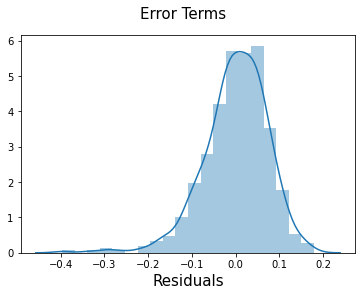

In [88]:
fig = plt.figure()
sns.distplot(res, bins = 20) # Ploted the distribution plot for residues and found it is normally distributed & with mean zero.
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

## Predictions and evaluations on test set


In [89]:
#     fit :        on training data 
#  transform :     on test set
# fit-transform:on training data set


In [90]:
df_test.head()

yr  holiday  workingday       temp      hum  windspeed  casual   cnt  \
184   0        1           0  29.793347  63.7917   5.459106    3065  6043   
535   1        0           1  32.082500  59.2083   7.625404     872  6211   
299   0        0           0  19.270000  81.2917  13.250121     240  2659   
221   0        0           1  31.433347  42.4167  13.417286     884  4780   
152   0        0           0  29.315000  30.5000  19.583229     736  4968   

     season_spring  season_summer  ...  mnth_Oct  mnth_Sep  weekday_mon  \
184              0              0  ...         0         0            0   
535              0              1  ...         0         0            0   
299              0              0  ...         1         0            0   
221              0              0  ...         0         0            0   
152              0              1  ...         0         0            0   

     weekday_sat  weekday_sun  weekday_thur  weekday_tues  weekday_wed  \
184            0            0             0             0            1   
535            0            0             1             0            0   
299            1            0             0             0            0   
221            0            0             0             0            0   
152            1            0             0             0            0   

     weathersit_lightrain  weathersit_mist  
184                     0                1  
535                     0                0  
299                     0                1  
221                     0                0  
152                     0                0  

[5 rows x 30 columns]

In [91]:

# create a var-list to transform, since we can only transform the test set. we need to just assume there is no data at all.
# since the scalling wont show any effect on categorical variables as they are already in between 0 and 1
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [92]:
df_test.head()

yr  holiday  workingday      temp       hum  windspeed    casual  \
184   0        1           0  0.831783  0.657364   0.084219  0.933557   
535   1        0           1  0.901354  0.610133   0.153728  0.265163   
299   0        0           0  0.511964  0.837699   0.334206  0.072539   
221   0        0           1  0.881625  0.437098   0.339570  0.268820   
152   0        0           0  0.817246  0.314298   0.537414  0.223712   

          cnt  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
184  0.692706              0              0  ...         0         0   
535  0.712034              0              1  ...         0         0   
299  0.303382              0              0  ...         1         0   
221  0.547400              0              0  ...         0         0   
152  0.569029              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thur  weekday_tues  \
184            0            0            0             0             0   
535            0            0            0             1             0   
299            0            1            0             0             0   
221            0            0            0             0             0   
152            0            1            0             0             0   

     weekday_wed  weathersit_lightrain  weathersit_mist  
184            1                     0                1  
535            0                     0                0  
299            0                     0                1  
221            0                     0                0  
152            0                     0                0  

[5 rows x 30 columns]

In [93]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.480828    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

           casual         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  220.000000  220.000000     220.000000     220.000000  ...  220.000000   
mean     0.266436    0.522154       0.254545       0.263636  ...    0.086364   
std      0.216751    0.219163       0.436599       0.441609  ...    0.281541   
min      0.002133    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.102484    0.378595       0.000000       0.000000  ...    0.000000   
50%      0.225236    0.524678       0.000000       0.000000  ...    0.000000   
75%      0.361780    0.677750       1.000000       1.000000  ...    0.000000   
max      1.038708    0.963300       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_mon  weekday_sat  weekday_sun  weekday_thur  \
count  220.000000   220.000000   220.000000   220.000000    220.000000   
mean     0.086364     0.118182     0.172727     0.154545      0.140909   
std      0.281541     0.323559     0.378873     0.362295      0.348721   
min      0.000000     0.000000     0.000000     0.000000      0.000000   
25%      0.000000     0.000000     0.000000     0.000000      0.000000   
50%      0.000000     0.000000     0.000000     0.000000      0.000000   
75%      0.000000     0.000000     0.000000     0.000000      0.000000   
max      1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_tues  weekday_wed  weathersit_lightrain  weathersit_mist  
count    220.000000   220.000000            220.000000       220.000000  
mean       0.122727     0.159091              0.027273         0.318182  
std        0.328872     0.366595              0.163248         0.466833  
min        0.000000     0.000000              0.000000         0.000000  
25%        0.000000     0.000000              0.000000         0.000000  
50%        0.000000     0.000000              0.000000         0.000000  
75%        0.000000     0.000000              0.000000         1.000000  
max        1.000000     1.000000              1.000000         1.000000  

[8 rows x 30 columns]

In [94]:
y_test = df_test.pop('cnt')    # pop out target variable from training set and assign it to y_test and the rest to X_test
X_test = df_test


In [95]:
X_test_sm = sm.add_constant(X_test) # add constant
X_test_sm.head()

const  yr  holiday  workingday      temp       hum  windspeed    casual  \
184    1.0   0        1           0  0.831783  0.657364   0.084219  0.933557   
535    1.0   1        0           1  0.901354  0.610133   0.153728  0.265163   
299    1.0   0        0           0  0.511964  0.837699   0.334206  0.072539   
221    1.0   0        0           1  0.881625  0.437098   0.339570  0.268820   
152    1.0   0        0           0  0.817246  0.314298   0.537414  0.223712   

     season_spring  season_summer  ...  mnth_Oct  mnth_Sep  weekday_mon  \
184              0              0  ...         0         0            0   
535              0              1  ...         0         0            0   
299              0              0  ...         1         0            0   
221              0              0  ...         0         0            0   
152              0              1  ...         0         0            0   

     weekday_sat  weekday_sun  weekday_thur  weekday_tues  weekday_wed  \
184            0            0             0             0            1   
535            0            0             1             0            0   
299            1            0             0             0            0   
221            0            0             0             0            0   
152            1            0             0             0            0   

     weathersit_lightrain  weathersit_mist  
184                     0                1  
535                     0                0  
299                     0                1  
221                     0                0  
152                     0                0  

[5 rows x 30 columns]

In [96]:
# creating X_test_new by dropping variables from X_test 
X_test_new = X_test_sm[X.columns]

# Add a constant 
X_test_new = sm.add_constant(X_test_new)

In [97]:
# making predictions
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

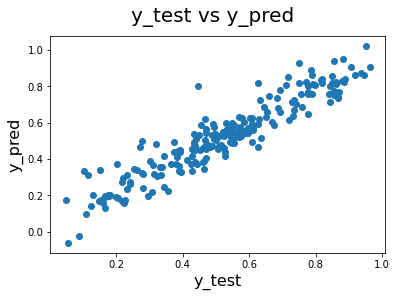

In [98]:
# plotting y_test vs y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel("y_test", fontsize = 16)
plt.ylabel('y_pred', fontsize = 16)

In [99]:
# lets see the R squared value for the test set, import required libraries.
from sklearn.metrics import r2_score

In [100]:
r2_score(y_true = y_test, y_pred = y_test_pred) #The R squared for the test set is approximately equal to R squared on training set

0.8773638318162271

## Conclusion : The model is perfect and ready to predict the bike rental demand, once the world return to normalcy from this pandemic.